In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
##Linear Regression with one feature

In [3]:
X = np.array([1,2,3,4,5]).reshape(-1,1)
Y = 2*X +5

In [4]:
print(X)
print(Y)

[[1]
 [2]
 [3]
 [4]
 [5]]
[[ 7]
 [ 9]
 [11]
 [13]
 [15]]


In [5]:
obj = LinearRegression()

In [6]:
dir(obj)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_set_intercept',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'n_jobs',
 'normalize',
 'predict',
 'score',
 'set_params']

In [7]:
model = obj.fit(X,Y)

In [8]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [9]:
model.score(X,Y)

1.0

In [10]:
model.intercept_

array([5.])

In [11]:
model.coef_

array([[2.]])

In [12]:
newData = np.array([[30]])
model.predict(newData)

array([[65.]])

In [13]:
newData = np.array([[-1]])
model.predict(newData)

array([[3.]])

In [14]:
X = np.array([[1,1],[1,2],[2,2],[2,3]])
Y = np.dot(X,np.array([2,3]))+5

In [15]:
print(X)
print(Y)

[[1 1]
 [1 2]
 [2 2]
 [2 3]]
[10 13 15 18]


In [16]:
obj = LinearRegression()
model = obj.fit(X,Y)

In [17]:
model.score(X,Y)

1.0

In [18]:
model.coef_

array([2., 3.])

In [19]:
model.intercept_

5.000000000000002

In [20]:
newData = np.array([[3,5]])

In [21]:
model.predict(newData)

array([26.])

In [22]:
#Import libraries
import numpy
import pandas
import sklearn
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
#from scipy.interpolate import spline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge

# Simple Regression

In [23]:
regression_data = pandas.read_csv('./data/class4/simple_regression_data.csv')

In [24]:
regression_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Volume  1000 non-null   float64
 1   Price   1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


This data contains volume and price of a metal taken by differennt vendors at different time

In [25]:
#Check initial data
regression_data.head()

,Volume,Price
0,4.690628,27.000389
1,4.235716,24.925126
2,4.626838,20.931068
3,6.166307,31.296321
4,3.433759,17.315909


<b>First we plot the data</b>

Text(0.5, 1.0, 'Price  - Volume Data')

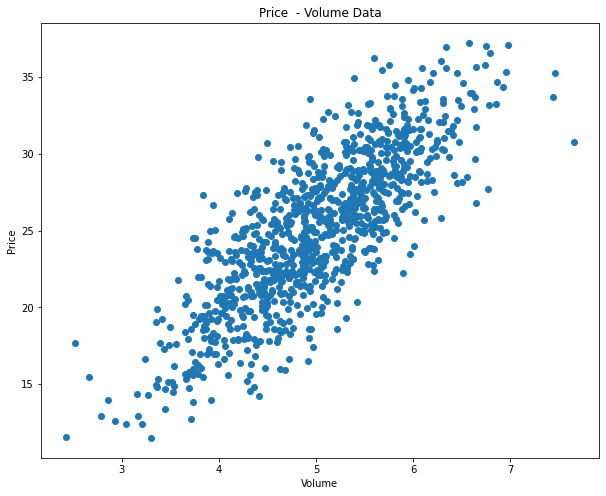

In [26]:
plt.scatter(regression_data['Volume'],regression_data['Price'])
plt.xlabel('Volume')
plt.ylabel('Price')
plt.title('Price  - Volume Data')

In [27]:
#Divide the data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(regression_data['Volume'],regression_data['Price'],test_size=0.20)

In [28]:
?train_test_split

Signature: train_test_split(*arrays, **options)
Docstring:
Split arrays or matrices into random train and test subsets

Quick utility that wraps input validation and
``next(ShuffleSplit().split(X, y))`` and application to input data
into a single call for splitting (and optionally subsampling) data in a
oneliner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float, int or None, optional (default=None)
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

train_size : float, int, or None, (default=None)
    If float, should be between 0.0 a

In [29]:
simple_linear_regression = LinearRegression()

#Train the model

simple_linear_regression.fit(pandas.DataFrame(X_train),pandas.DataFrame(Y_train))

#Make prediction
Y_pred = simple_linear_regression.predict(pandas.DataFrame(X_test))

In [30]:
print(simple_linear_regression.score)

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>


In [31]:
?LinearRegression.score

Signature: LinearRegression.score(self, X, y, sample_weight=None)
Docstring:
Return the coefficient of determination R^2 of the prediction.

The coefficient R^2 is defined as (1 - u/v), where u is the residual
sum of squares ((y_true - y_pred) ** 2).sum() and v is the total
sum of squares ((y_true - y_true.mean()) ** 2).sum().
The best possible score is 1.0 and it can be negative (because the
model can be arbitrarily worse). A constant model that always
predicts the expected value of y, disregarding the input features,
would get a R^2 score of 0.0.

Parameters
----------
X : array-like of shape (n_samples, n_features)
    Test samples. For some estimators this may be a
    precomputed kernel matrix or a list of generic objects instead,
    shape = (n_samples, n_samples_fitted),
    where n_samples_fitted is the number of
    samples used in the fitting for the estimator.

y : array-like of shape (n_samples,) or (n_samples, n_outputs)
    True values for X.

sample_weight : array-like o

In [32]:
simple_linear_regression.intercept_

array([0.14173728])

In [33]:
simple_linear_regression.coef_

array([[4.98886033]])

In [34]:
print("Mean squared error:%.1f" %mean_squared_error(Y_test,Y_pred))

Mean squared error:8.7


In [35]:
print("R2 Score: %.2f" %r2_score(Y_test,Y_pred))

R2 Score: 0.61


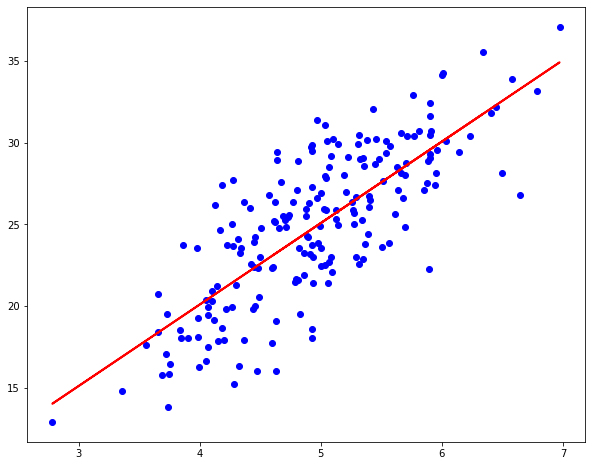

In [36]:
plt.scatter(X_test,Y_test,color="blue")
plt.plot(X_test,Y_pred,color="red",linewidth=2)